In [2]:
pip install pandas matplotlib seaborn


^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\Users\\Hp-D\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\kiwisolver-1.4.7.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.1.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached seaborn-0.13.2-p

In [4]:
import pandas as pd

# Read dataset using pandas function with parse_dates to handle Date column as datetime
dataset = pd.read_csv("gold_price_data.csv", parse_dates=["Date"])


In [3]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Information about the dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [6]:
# Missing Values/Null Values Count
dataset.isna().sum().sort_values(ascending=False)


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

correlation between columns

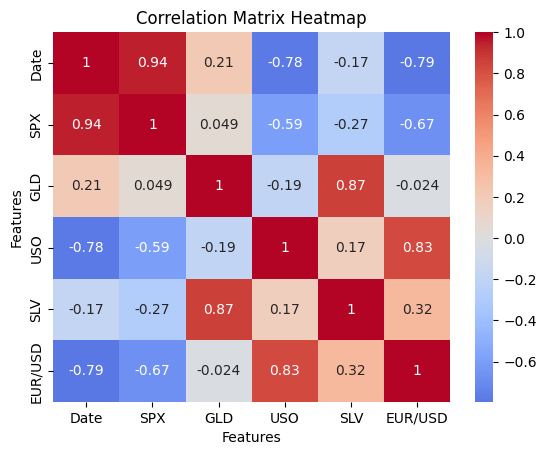

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation = dataset.corr()

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()


In [8]:
# Drop the SLV column
dataset.drop("SLV", axis=1, inplace=True)


data wrangling

In [9]:
# Set the Date column as the index
dataset.set_index("Date", inplace=True)


plotting gold price trends

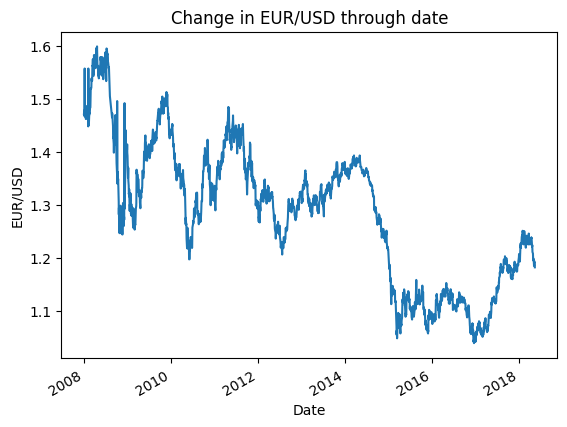

In [10]:
# Plot the EUR/USD prices over time
dataset["EUR/USD"].plot()
plt.title("Change in EUR/USD through date")
plt.xlabel("Date")
plt.ylabel("EUR/USD")
plt.show()


trend with moving averages

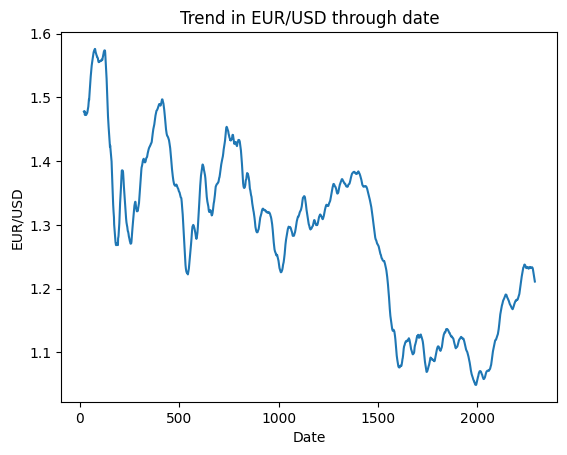

In [11]:
# Apply a rolling mean with a window size of 20
dataset["price_trend"] = dataset["EUR/USD"].rolling(window=20).mean()

# Reset index to plot
dataset.reset_index("Date", inplace=True)

# Plot the smoothed data
dataset["price_trend"].loc[20:].plot()
plt.title("Trend in EUR/USD through date")
plt.xlabel("Date")
plt.ylabel("EUR/USD")
plt.show()


distribution of columns

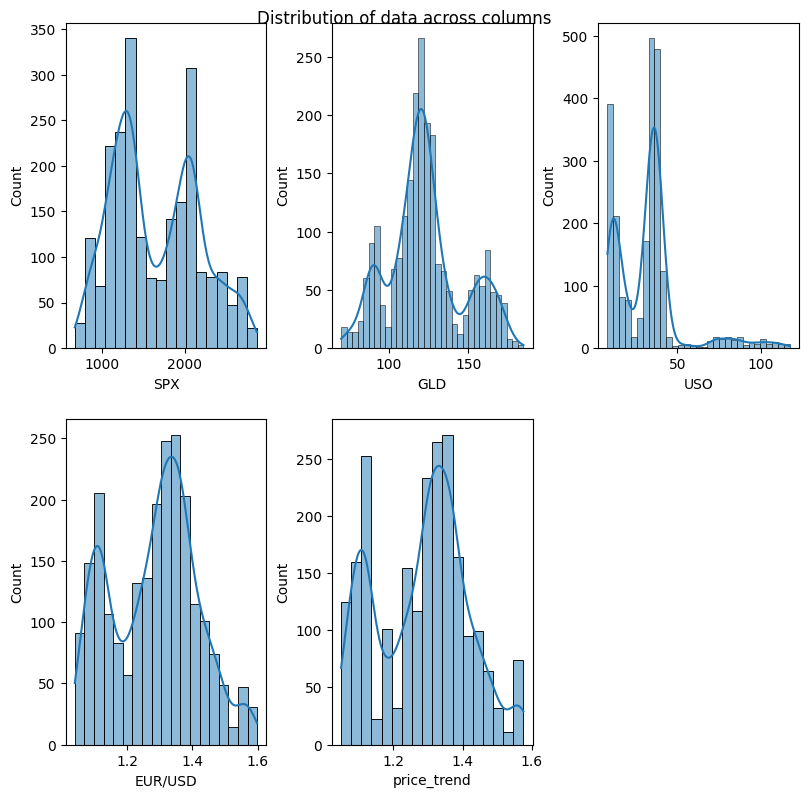

In [12]:
# Plot the distribution of numerical columns
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Distribution of data across columns')

# Drop the Date column and plot histograms for other columns
columns = dataset.drop("Date", axis=1).columns.tolist()

for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=dataset, x=col, kde=True)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()


checking skewness


ValueError: num must be an integer with 1 <= num <= 6, not 7

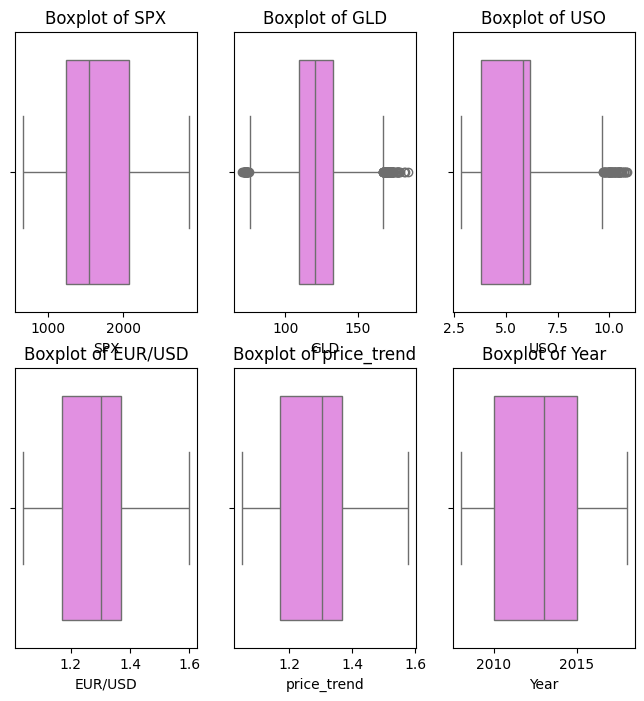

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot for each feature (excluding 'Date')
fig = plt.figure(figsize=(8, 8)) 
temp = dataset.drop("Date", axis=1).columns.tolist()

for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)  # Arrange the subplots in a 2x3 grid
    sns.boxplot(data=dataset, x=item, color='violet')
    plt.title(f'Boxplot of {item}')
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)  # Adjust layout
plt.show()


In [13]:
# Check skewness of the dataset
print(dataset.drop("Date", axis=1).skew(axis=0, skipna=True))


SPX            0.300362
GLD            0.334138
USO            1.699331
EUR/USD       -0.005292
price_trend   -0.029588
dtype: float64


In [14]:
# Apply square root transformation to reduce skewness of USO column
dataset["USO"] = dataset["USO"].apply(lambda x: x**0.5)


In [15]:
# Extract year, month, and day from the Date column
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day


handling outliers

In [16]:
# Detect outliers using IQR method
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
dataset_cleaned = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


c:\Users\Hp-D\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
c:\Users\Hp-D\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


rolling window statistics
for mean , sd

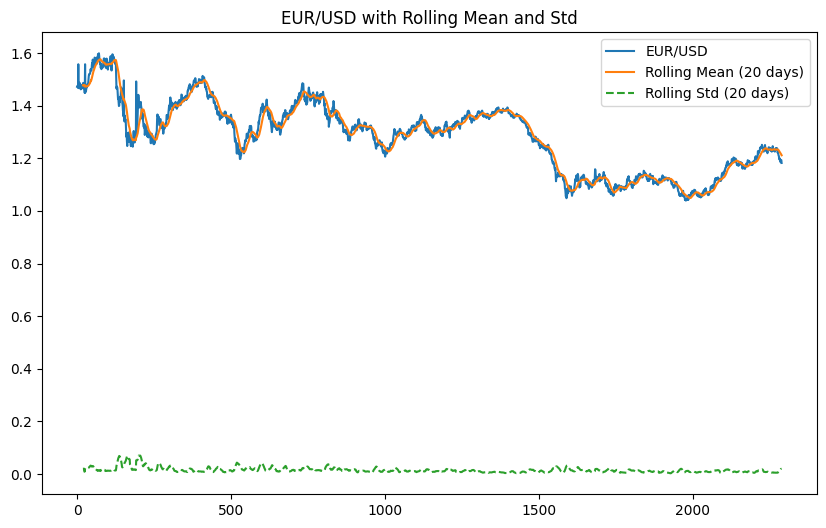

In [19]:
# Calculate rolling mean and rolling standard deviation
dataset['rolling_mean'] = dataset['EUR/USD'].rolling(window=20).mean()
dataset['rolling_std'] = dataset['EUR/USD'].rolling(window=20).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(dataset['EUR/USD'], label='EUR/USD')
plt.plot(dataset['rolling_mean'], label='Rolling Mean (20 days)')
plt.plot(dataset['rolling_std'], label='Rolling Std (20 days)', linestyle='--')
plt.title('EUR/USD with Rolling Mean and Std')
plt.legend()
plt.show()


autocorrelation plot

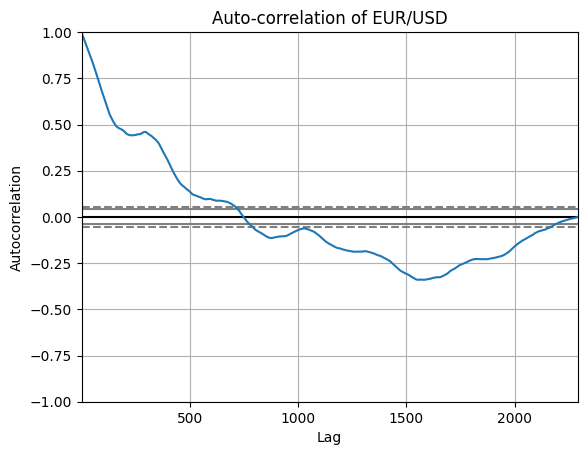

In [20]:
from pandas.plotting import autocorrelation_plot

# Plot auto-correlation of EUR/USD
autocorrelation_plot(dataset['EUR/USD'])
plt.title('Auto-correlation of EUR/USD')
plt.show()


INSIGHTS AND CONCLUSIONS 
The dataset had no missing values, indicating clean and complete data.
The heatmap of the correlation matrix shows that some features (e.g., GLD and SLV) are highly correlated, meaning they move in a similar direction. This indicates a strong relationship between gold and silver prices, as they are both precious metals and often behave similarly in financial markets.
EUR/USD had a weak negative correlation with other features, suggesting that currency exchange rates may not be as strongly tied to commodity prices in this dataset.
The histogram showed the distribution of features like SPX, GLD, USO, and EUR/USD. The skewness values indicated that some columns, especially USO, were highly skewed, implying that there were more small values and a few extremely large ones.


Questions 
Why is the correlation between GLD and SLV so strong?
How can we handle outliers or extreme values in the dataset?
